## Введение

### Формулировка задачи

``Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.``


**Предварительный план проекта**

- рассмотреть исходные данные, определиться со стратегией их обработки
- создать сводные таблицы с нужными значениями, в том числе вычисленными.
- произвести анализ результатов
- проверить гипотезы

### Загрузка стандартных бибилотек и чтение файлов

Загружаем стандартные библиотеки, которые планируются к использованию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from functools import reduce

Для форматирования вывода применяем опцию Pandas

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format) 

Читаем файлы и сохраняем их в DataFrame

In [3]:
calls_df = pd.read_csv('./datasets/calls.csv',  sep=',')
internet_df = pd.read_csv('./datasets/internet.csv',  sep=',')
messages_df = pd.read_csv('./datasets/messages.csv',  sep=',')
tariffs_df = pd.read_csv('./datasets/tariffs.csv',  sep=',')
users_df = pd.read_csv('./datasets/users.csv',  sep=',')

Проверяем информацию по каждому фрейму:

In [4]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls_df.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


По результатам осмотра датафрейма `calls_df`:

- Дата ***call_date*** представлена строковым объектом, вместо datetime.
---

In [6]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
internet_df.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


По результатам осмотра датафрейма `internet_df`:

- Дата ***session_date*** представлена строковым объектом, вместо datetime64.
- Колонка ***Unnamed: 0*** очевидно ошибочна, и предположительно является старым индексом, преобразовавшимся в колонку, подлежит удалению.
---

In [8]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
messages_df.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


По результатам осмотра датафрейма `messages_df`:

- Дата ***message_date*** представлена строковым объектом, вместо datetime64.
---

In [10]:
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
tariffs_df

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


По результатам осмотра датафрейма `tariffs_df`:

- Проблем не наблюдается.
---

In [12]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
users_df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


По результатам осмотра датафрейма `users_df`:

- Дата ***reg_date*** представлена строковым объектом, вместо datetime64.
- Пропуски в ***churn_date*** ожидаемы, и обозначают активных клиентов, в соответствии с описанием данных.
---

**Описание данных в соответствии с заданием (для сведения):**

Таблица **users** (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

Таблица **calls** (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

Таблица **messages** (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

Таблица **internet** (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

Таблица **tariffs** (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Подготовка данных

### Предобработка данных

Конвертируем все стоблцы с датами в тип datetime64 методом `pd.to_datetime`

In [14]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')

Определим количество звонков нулевой длины:

In [15]:
print(
    round(
        (len(calls_df.query('duration == 0')) / len(calls_df) * 100),
        2), '%')

19.55 %


Получившееся значение является слишком большим, чтобы его обработать заменой на медиану или среднее, в тоже время это не обязательно является ошибкой, так как звонок мог быть зарегистрирован ("гудки пошли"), но не обязательно состоялся, в связи с чем, оставляем без изменения.

C учётом условия об округлении

`«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.`

Округлим вверх значения `duration` и `mb_used` с использованем np.ceil

In [16]:
calls_df['duration'] = calls_df['duration'].apply(np.ceil).astype(int)
internet_df['mb_used'] = internet_df['mb_used'].apply(np.ceil).astype(int)

Удалим заведомо ошибочную колонку с именем `Unnamed: 0`

In [17]:
internet_df.drop(columns=['Unnamed: 0'], inplace=True)

Проверим информацию по датафреймам, в том числе количество дубликатов.

In [18]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [19]:
print('Количество уникальных пользователей в calls_df:', len(calls_df.user_id.unique()))

print('Количество дубликатов в calls_df:', calls_df.duplicated().sum())

Количество уникальных пользователей в calls_df: 492
Количество дубликатов в calls_df: 0


In [20]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  int64         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


In [21]:
print('Количество уникальных пользователей в internet_df:', len(internet_df.user_id.unique()))

print('Количество дубликатов в internet_df:', internet_df.duplicated().sum())

Количество уникальных пользователей в internet_df: 497
Количество дубликатов в internet_df: 0


In [22]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [23]:
print('Количество уникальных пользователей в messages_df:', len(messages_df.user_id.unique()))

print('Количество дубликатов в messages_df:', messages_df.duplicated().sum())

Количество уникальных пользователей в messages_df: 426
Количество дубликатов в messages_df: 0


In [24]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [25]:
print('Количество уникальных пользователей в users_df:', len(users_df.user_id.unique()))

print('Количество дубликатов в users_df:', users_df.duplicated().sum())

Количество уникальных пользователей в users_df: 500
Количество дубликатов в users_df: 0


**Промежуточные выводы**

1. Дубликаты в датафреймах после всех преобразований не обнаружены.
2. Количество уникальных пользователей в таблицах с звонками, сообщениями и интернет-трафиком различно и составляет от 426 до 497 пользователей из 500 возможных. Предположительно это означает, что некоторые из пользователей могли не пользоваться некоторыми из видов связи за отчётный период.


### Подготовка данных к работе

Для каждого пользователя получим интересующие нас в дальнейшем данные.

Для расчётов по месяцам, выделим название месяца в отдельные колонки в интересующих датафреймах методом Pandas `dt.month_name()`, также для сортировки добавим их численное представление методом `dt.month`.

Для большей компактности на графиках, урежем название месяцев до 3х букв методом `str.slice`

In [26]:
calls_df['month'] = calls_df['call_date'].dt.month_name().str.slice(stop=3)
internet_df['month'] = internet_df['session_date'].dt.month_name().str.slice(stop=3)
messages_df['month'] = messages_df['message_date'].dt.month_name().str.slice(stop=3)

calls_df['nmonth'] = calls_df['call_date'].dt.month
internet_df['nmonth'] = internet_df['session_date'].dt.month
messages_df['nmonth'] = messages_df['message_date'].dt.month

Для определение количества сделанных звонков и израсходованных минут разговора по месяцам возмользуемся сводной таблицей с функциями `sum` и `count`.

In [27]:
call_pivot = calls_df.pivot_table(
    index=['user_id', 'month', 'nmonth'], values='duration', aggfunc=['sum', 'count']
)
call_pivot.columns = ['calls_duration', 'calls_count']

Количество отправленных сообщений по месяцам также определим с использованием сводной таблицы с группировкой по новосозданной колонке `month`

In [28]:
message_pivot = messages_df.pivot_table(
    index=['user_id', 'month', 'nmonth'], values='id', aggfunc=['count']
)
message_pivot.columns = ['message_count']

Объем израсходованного интернет-трафика по месяцам аналогично

In [29]:
internet_pivot = internet_df.pivot_table(
    index=['user_id','month', 'nmonth'], values='mb_used', aggfunc=['sum']
)
internet_pivot.columns = ['mb_used_total']

Объёдиним полученные сводные таблицы в одну общую методом `merge` с использованием функции `reduce` из модуля `functools`.

In [30]:
data_to_merge = [internet_pivot, call_pivot, message_pivot]

df_merged = reduce(lambda left,right: pd.merge(
    left,
    right,
    how="outer",
    on=['user_id', 'month', 'nmonth']
), data_to_merge)

In [31]:
df_merged

mb_used_total  calls_duration  calls_count  \
user_id month nmonth                                               
1000    Aug   8           14,070.00          408.00        52.00   
        Dec   12           9,827.00          333.00        46.00   
        Jul   7           14,016.00          340.00        47.00   
        Jun   6           23,257.00          172.00        43.00   
        May   5            2,256.00          159.00        22.00   
...                             ...             ...          ...   
1273    Oct   10                NaN          315.00        40.00   
        Sep   9                 NaN          223.00        33.00   
1377    Feb   2                 NaN          179.00        23.00   
1392    Feb   2                 NaN           13.00         2.00   
1446    Aug   8                 NaN           50.00         4.00   

                      message_count  
user_id month nmonth                 
1000    Aug   8               81.00  
        Dec   12              70.00  
        Jul   7               75.00  
        Jun   6               60.00  
        May   5               22.00  
...                             ...  
1273    Oct   10              35.00  
        Sep   9               32.00  
1377    Feb   2                2.00  
1392    Feb   2                3.00  
1446    Aug   8                1.00  

[3214 rows x 4 columns]

Добавим к полученной таблице названия тарифов соотвествующие каждому из `user_id`, с заполнением NaN значений нулями (отсутствие данных предположительно означает, что клиент не использовал данный метод связи в течение месяца)

In [32]:
data = pd.merge(
    df_merged.reset_index(), #left
    users_df[['user_id', 'city', 'tariff']], #right
    how="right",
    on=['user_id']
).fillna(0).rename(columns={'tariff': 'tariff_name'})

In [33]:
data.shape[0]

3216

Проверяем, не появилось ли пользователей без всяких данных, в особенности, без дат. Так как в предыдущем шаге мы провели `fillna(0)`, то проверяем колонку `month` сравнивая её с 0, которое заменило NaN.

In [34]:
data.query('month == 0')

,user_id,month,nmonth,mb_used_total,calls_duration,calls_count,message_count,city,tariff_name
827,1128,0,0.00,0.00,0.00,0.00,0.00,Волжский,ultra
2335,1371,0,0.00,0.00,0.00,0.00,0.00,Омск,smart


In [35]:
data = data.query('month != 0').copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3215
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   object 
 2   nmonth          3214 non-null   float64
 3   mb_used_total   3214 non-null   float64
 4   calls_duration  3214 non-null   float64
 5   calls_count     3214 non-null   float64
 6   message_count   3214 non-null   float64
 7   city            3214 non-null   object 
 8   tariff_name     3214 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 251.1+ KB


Производим сортирвку по колонке "временной" колонке `nmonth`

In [36]:
data = data.sort_values(['user_id', 'nmonth'], ascending=[1,1]).set_index(['user_id', 'month'])

Возвращаем типы данных к нормальным, целочисленным.

In [37]:
data['message_count'] = data['message_count'].astype(int)
data['calls_count'] = data['calls_count'].astype(int)
data['mb_used_total'] = data['mb_used_total'].astype(int)
data['calls_duration'] = data['calls_duration'].astype(int)
data['nmonth'] = data['nmonth'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 'May') to (1499, 'Dec')
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nmonth          3214 non-null   int64 
 1   mb_used_total   3214 non-null   int64 
 2   calls_duration  3214 non-null   int64 
 3   calls_count     3214 non-null   int64 
 4   message_count   3214 non-null   int64 
 5   city            3214 non-null   object
 6   tariff_name     3214 non-null   object
dtypes: int64(5), object(2)
memory usage: 205.7+ KB


In [38]:
data.head()

nmonth  mb_used_total  calls_duration  calls_count  \
user_id month                                                       
1000    May         5           2256             159           22   
        Jun         6          23257             172           43   
        Jul         7          14016             340           47   
        Aug         8          14070             408           52   
        Sep         9          14581             466           58   

               message_count       city tariff_name  
user_id month                                        
1000    May               22  Краснодар       ultra  
        Jun               60  Краснодар       ultra  
        Jul               75  Краснодар       ultra  
        Aug               81  Краснодар       ultra  
        Sep               57  Краснодар       ultra

Для упрощения расчётов без использования сторонних функций - добавим данные по тарифам в таблицу:

In [39]:
data = pd.merge(
    data.reset_index(), #left
    tariffs_df, #right
    how="left",
    on=['tariff_name']
).set_index(['user_id', 'month'])

In [40]:
data.head()

nmonth  mb_used_total  calls_duration  calls_count  \
user_id month                                                       
1000    May         5           2256             159           22   
        Jun         6          23257             172           43   
        Jul         7          14016             340           47   
        Aug         8          14070             408           52   
        Sep         9          14581             466           58   

               message_count       city tariff_name  messages_included  \
user_id month                                                            
1000    May               22  Краснодар       ultra               1000   
        Jun               60  Краснодар       ultra               1000   
        Jul               75  Краснодар       ultra               1000   
        Aug               81  Краснодар       ultra               1000   
        Sep               57  Краснодар       ultra               1000   

               mb_per_month_included  minutes_included  rub_monthly_fee  \
user_id month                                                             
1000    May                    30720              3000             1950   
        Jun                    30720              3000             1950   
        Jul                    30720              3000             1950   
        Aug                    30720              3000             1950   
        Sep                    30720              3000             1950   

               rub_per_gb  rub_per_message  rub_per_minute  
user_id month                                               
1000    May           150                1               1  
        Jun           150                1               1  
        Jul           150                1               1  
        Aug           150                1               1  
        Sep           150                1               1

### Помесячная выручка

Для получения помесячной выручки первым шагом определим превышение тарифного пакета: 

In [41]:
data['calls_cost'] = (data['calls_duration'] - data['minutes_included']) * data['rub_per_minute']
data['message_cost'] = (data['message_count'] - data['messages_included']) * data['rub_per_message']
data['internet_cost'] = (data['mb_used_total'] - data['mb_per_month_included'])/1024 * data['rub_per_gb']

Данные способ вполне ожидаем генерирует отрицательные значения, которые означают, что потреблено было меньше, чем включено в пакет, в связи с этим, переплата за них отсуствует, и равна нулю

In [42]:
data.loc[data['calls_cost'] < 0, 'calls_cost'] = 0
data.loc[data['message_cost'] < 0, 'message_cost'] = 0
data.loc[data['internet_cost'] < 0, 'internet_cost'] = 0

Создаём колонку с заработком `gain`:

In [43]:
data['gain'] = data['calls_cost'] + data['message_cost'] + data['internet_cost'] + data['rub_monthly_fee']

Создаём DataFrame c без лишних сведений, для дальнешей работы

In [44]:
result = data[['message_count', 'mb_used_total', 'calls_duration', 'calls_count', 'tariff_name', 'city', 'gain']].copy()

In [45]:
result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 'May') to (1499, 'Dec')
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   message_count   3214 non-null   int64  
 1   mb_used_total   3214 non-null   int64  
 2   calls_duration  3214 non-null   int64  
 3   calls_count     3214 non-null   int64  
 4   tariff_name     3214 non-null   object 
 5   city            3214 non-null   object 
 6   gain            3214 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 205.7+ KB


**Вывод**
Данные подготовлены и готовы к анализу. Добавлена колонка с заработком на каждом клиенте по месяцам.

## Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Для определение средних значений и стандартных отклонений продолжительности разговора, количества сообщений и объёма трафика каждого из тарифов воспользуемся функцией `describe()` библиотеки Pandas. Нам нужны только строки 1 и 2 из вывода этой функции.

In [46]:
mean_ultra = result.query("tariff_name == 'ultra'").describe().iloc[[1,2]]

In [47]:
mean_smart = result.query("tariff_name == 'smart'").describe().iloc[[1,2]]

Дисперсия, следовательно, представляет собой квадрат от стандартного отклонения

In [48]:
mean_ultra = mean_ultra.append((mean_ultra.loc['std']**2))
mean_smart = mean_smart.append((mean_smart.loc['std']**2))
mean_ultra.index = ['mean', 'std', 'var']
mean_smart.index = ['mean', 'std', 'var']

In [49]:
mean_ultra

,message_count,mb_used_total,calls_duration,calls_count,gain
mean,49.36,"19,486.90",526.62,73.39,"2,060.53"
std,47.80,"10,096.32",317.61,43.92,356.31
var,"2,285.27","101,935,621.05","100,873.63","1,928.69","126,953.29"


In [50]:
mean_smart

,message_count,mb_used_total,calls_duration,calls_count,gain
mean,33.38,"16,229.19",417.93,58.46,"1,233.35"
std,28.23,"5,877.58",190.31,25.94,787.69
var,796.81,"34,545,911.13","36,219.32",672.88,"620,452.61"


Построим наглядный график заработка на клиентах по месяцам, на котором графически видны как средние значения (в районе 2000 для тарифа ***Ultra***, и в районе 1200 для тарифа ***Smart***), так и в два раза большее стандартное отклонение тарифа ***Smart***

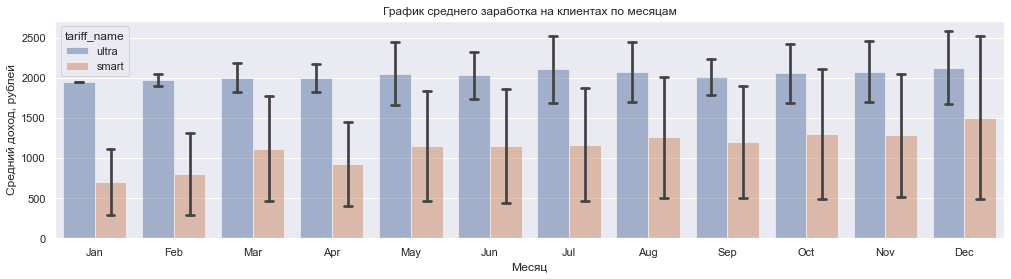

In [51]:
sns.set(rc={'figure.figsize':(17,4)})
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax = sns.barplot(
    x="month",
    y="gain",
    hue="tariff_name",
    data=result.reset_index(),
    order=months_order,
    ci="sd",  #отображение стандартного отклонения
    alpha=0.5,
    capsize=.1
)

ax.set_title('График среднего заработка на клиентах по месяцам')
ax.set_xlabel("Месяц")
ax.set_ylabel("Средний доход, рублей")
plt.show()

На графике **среднего заработка** видна разница между стоимостью тарифа ***Ultra*** и ***Smart***, которая соответсвует рассчитаным средним значениям.

Основные сезонные колебания среднего дохода от клиента можно отследить по тарифу ***Smart***, как имеющего наименьшие тарифные пакеты, которые легче превысить:

- Первые два месяца года люди довольно неохотно пользуются связью, и почти не выходят за границы пакетов, из чего можно предположить, что основные пользователи данных видов связи используют их по рабочим нуждам (начало года традиционно насыщенно нерабочими днями, которые не должны были повлиять на связь личную)
- В ещё одно подтверждение теории об рабочем использованиии связи гласит и то, что больше всего трат (т.е. выходов за границы тарифного пакета) наблюдается в декабре.
- Также наблюдается странное падение потребления в апреле, что довольно нелогично, так как апрель не имеет каких-либо характерных особенностей.

---

Также построим сравнительные графики потребления клиентами различных способов связи

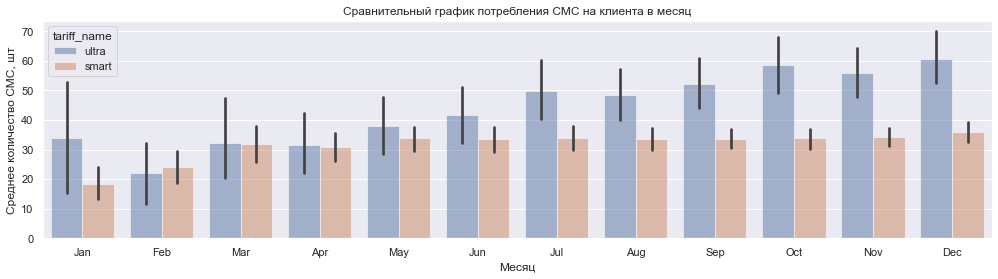

In [52]:
bx = sns.barplot(
    x="month",
    y="message_count",
    hue="tariff_name",
    data=result.reset_index(),
    order=months_order,
    alpha=0.5,
)

bx.set_title('Сравнительный график потребления СМС на клиента в месяц')
bx.set_xlabel("Месяц")
bx.set_ylabel("Среднее количество СМС, шт")
plt.show()

**Потребление СМС** довольно разнообразно, и в среднем потребляется больше пользователями тарифа ***Ultra***.

Основные сезонные колебания количества СМС:

- Первый вывод аналогичен выводу по среднему заработку - первые два месяца года люди менее охотно пользуются связью, единственое отклонение - поведение пользователей тарифа ***Ultra***, с падением в феврале.
- В среднем, всем пользователям достаточно было бы пакета СМС из тарифа ***Smart*** (50 штук), за исключением конца года.

---

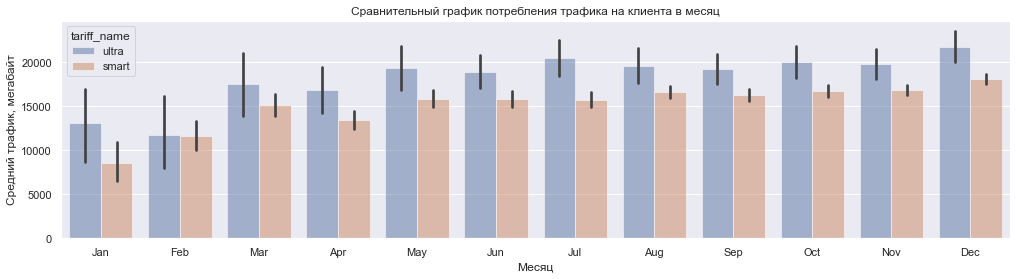

In [53]:
cx = sns.barplot(
    x="month",
    y="mb_used_total",
    hue="tariff_name",
    data=result.reset_index(),
    order=months_order,
    alpha=0.5,
)

cx.set_title('Сравнительный график потребления трафика на клиента в месяц')
cx.set_xlabel("Месяц")
cx.set_ylabel("Средний трафик, мегабайт")
plt.show()

**Потребление трафика** довольно близко, несмотря на разницу в тарифах в два раза.

В среднем, все пользователи стремятса к значению в 20 ГБайт трафика, что сильно меньше размера пакета тарифа ***Ultra*** (30 Гбайт) ,но больше пакета тарифа ***Smart*** (15 Гбайт).

Основные сезонные колебания количества трафика:

- В продолжение теории о рабочем назначении пользователей тарифа ***Smart*** напрашивается вывод о большем количестве использователей в личных целей со стороны пользователей тарифа ***Ultra*** ("новогодние звонки и СМС")

---

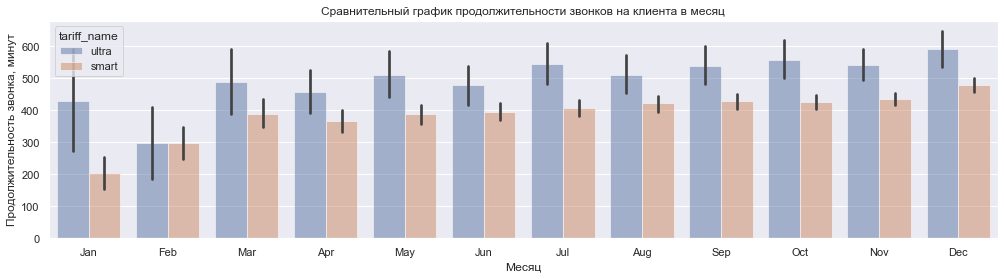

In [54]:
dx = sns.barplot(
    x="month",
    y="calls_duration",
    hue="tariff_name",
    data=result.reset_index(),
    order=months_order,
    alpha=0.5,
)

dx.set_title('Сравнительный график продолжительности звонков на клиента в месяц')
dx.set_xlabel("Месяц")
dx.set_ylabel("Продолжительность звонка, минут")
plt.show()

**Потребление звонков** также довольно близко, несмотря на разницу в тарифах в **шесть** раз.

В среднем, все пользователи стремятса к значению в 550 минут звонков, что сильно меньше размера пакета тарифа ***Ultra*** (3000 минут),и почти совпадает с размерами пакета тарифа ***Smart*** (500 минут).

В связи с этим необходимо оценить целесообразность уменьшения размеров включённых пакетов тарифа ***Smart*** в сторону уменьшения, к примеру до 350-400 минут.

Выводы по потреблению звонков в зависимости от времени года, в общем, аналогичны выводам про потребление трафика. 

---

Построим гистограммы дохода тарифов ***Ultra*** и ***Smart***.

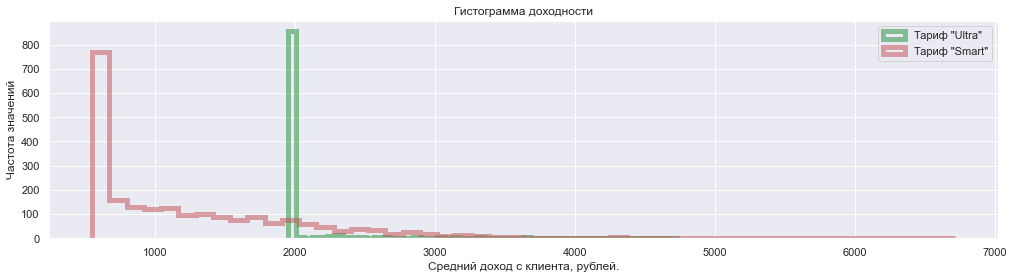

In [55]:
ultra_ax = result.query("tariff_name == 'ultra'").plot(
    kind='hist',
    y='gain',
    histtype='step',
    bins=50,
    linewidth=5,
    color="g",
    alpha=0.7,
    title='Гистограмма доходности',
    grid=True,
    figsize=(17,4)
)
smart_ax = result.query("tariff_name == 'smart'").plot(
    kind='hist',
    y='gain',
    histtype='step',
    bins=50,
    linewidth=5,
    color="r",
    alpha=0.5,
    ax=ultra_ax,
    figsize=(17,4)
)

ultra_ax.set_xlabel("Средний доход с клиента, рублей.") 
ultra_ax.set_ylabel("Частота значений")
ultra_ax.legend(['Тариф "Ultra"', 'Тариф "Smart"']) 
plt.show()

Данные гистограммы подтверждают, чтоб чаще всего клиенты держаться в рамках стоимости тарифного плана, и не выходят за него, но пользователям тарифа ***Smart*** включенных в пакет способов связи недостаточно, в связи с чем они чаще выходят за его границы.

Проверим, насколько переплачивают пользователи тарифа ***Ultra***

In [56]:
print(
    round(
        (result.query("tariff_name == 'ultra'")['gain'].mean() / tariffs_df.iloc[1]['rub_monthly_fee'] - 1)*100,
        2), '%')

5.67 %


... и тарифа ***Smart***

In [57]:
print(
    round(
        (result.query("tariff_name == 'smart'")['gain'].median() / (tariffs_df.iloc[0]['rub_monthly_fee'])-1)*100,
        2), '%')

74.53 %


**Вывод**

Выводы вполне однозначны, люди примущественно пользуются довольно сходным количеством трафика и минут звонков, что приводит к необходимости доплат со стороны пользователей тарифа ***Smart*** за превышения пакета.

## Проверьте гипотезы

Произведём проверку двух гипотез о равенстве средних двух совокупностей:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Установим значение критического уровня статистической значимости равное 5%

In [58]:
alpha = 0.05

Проверим гипотезы о средней выручке пользователей двух тарифов с использованием возможностей метода `scipy.stats.ttest_ind`. Значение `equal_var` установим как *False*, так как выборки отличаются.

Нулевой гипотезой в данном случае станет "Средняя выручка пользователей тарифов - одинакова"

Альтернативной же гипотезой будет "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"

In [59]:
profit_hypo = st.ttest_ind(
    result.query("tariff_name == 'ultra'")['gain'],
    result.query("tariff_name == 'smart'")['gain'],
    equal_var = False)
 
print('p-значение:', profit_hypo.pvalue)
 
if profit_hypo.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, принимаем альтернативную.')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.931402711366754e-296
Отвергаем нулевую гипотезу, принимаем альтернативную.


Следовательно, принимаем альтернативную гипотезу, и предполагаем, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

___

Проверим гипотезы о средней выручке пользователей различных населённых пунктов с использованием возможностей метода `scipy.stats.ttest_ind`. Значение `equal_var` установим как *True*, так как по сути пользуемся одной общей выборкой.

Нулевой гипотезой в данном случае станет "Средняя выручка пользователей из Москвы совпадает с средней выручкой от пользователей из других регионов"

Альтернативной же гипотезой будет "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

In [60]:
city_hypo = st.ttest_ind(
    result.query("city == 'Москва'")['gain'],
    result.query("city != 'Москва'")['gain'],
    equal_var = True)
 
print('p-значение:', city_hypo.pvalue)
 
if city_hypo.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.47443187631524797
Не получилось отвергнуть нулевую гипотезу


Следовательно, принимаем нулевую гипотезу, как основную, и делаем вывод, что средняя выручка пользователей из Москвы и других регионов - не отличается, а разное значение можно получить с вероятностью в 47% случайно.

## Общий вывод:

Люди примущественно пользуются сходным количеством трафика и минут звонков, что приводит к необходимости доплат со стороны пользователей тарифа ***Smart*** за превышения пакета. Если выразить переплату в процентах, то она составляет 75% от базовой стоимости пакета.

Хоть в асболютных значениях средняя плата за тариф ***Ultra*** и больше, но с точки зрения компании "Мегалайн" выгоднее является тариф ***Smart***, в связи с его *изначально* более низкой ценой,а следовательно, большей востребованности на рынке. (Людям свойственно покупать более дешёвые вещи, даже если их экспуалатция обойдётся дороже на дистанции).

Проверка же гипотез показывает: 
- средняя выручка клиентов разных тарифов различается, что ожидаемо
- выручка не зависит от места проживания клиента (Москва или другие регионы). 